In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
np.random.seed(2)

In [2]:
df = pd.read_csv("fastext_model_100.csv").drop('Unnamed: 0', axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.027579,0.002424,0.023581,0.008453,0.019583,-0.024582,0.012151,-0.031900,0.060829,0.013991,...,0.032896,-0.012182,-0.047118,-0.025301,-0.057212,-0.086832,-0.039831,0.018530,-0.020585,-0.034059
1,-0.026885,0.003810,0.024316,0.008178,0.020824,-0.025168,0.010156,-0.033187,0.060889,0.013415,...,0.031751,-0.012215,-0.050246,-0.027339,-0.056520,-0.088164,-0.039944,0.019452,-0.022473,-0.033879
2,-0.026232,0.003427,0.024617,0.007665,0.021201,-0.025050,0.010292,-0.033020,0.061476,0.014163,...,0.031654,-0.011272,-0.049284,-0.026284,-0.056400,-0.088281,-0.039921,0.019736,-0.021041,-0.034226
3,-0.025623,0.003260,0.024604,0.006548,0.020098,-0.024062,0.011035,-0.031944,0.060475,0.013143,...,0.027887,-0.011412,-0.048405,-0.029577,-0.056285,-0.086811,-0.037539,0.020075,-0.022678,-0.033365
4,-0.026914,0.002674,0.025563,0.006715,0.020958,-0.025567,0.010664,-0.032295,0.061010,0.015246,...,0.031140,-0.011087,-0.049228,-0.026545,-0.056590,-0.088058,-0.040251,0.019940,-0.021154,-0.033019


In [28]:
for n_comp in [10,20,30,40,50]:
    model_pca = PCA(n_components=n_comp)
    data_pca = model_pca.fit_transform(df)
    print(f"# componentes {n_comp}\t{sum(model_pca.explained_variance_ratio_)}")

# componentes 10	0.9462586845571843
# componentes 20	0.9962151943491594
# componentes 30	0.99999865297869
# componentes 40	0.9999999971857959
# componentes 50	0.9999999994698556


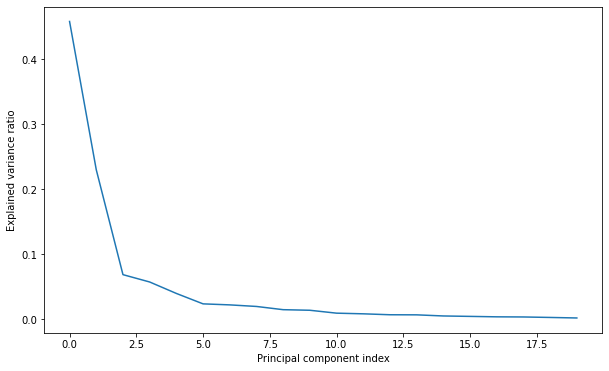

In [107]:
model_pca = PCA(n_components=20)
data_pca = model_pca.fit_transform(df)

plt.figure(figsize=(10,6))
plt.plot(model_pca.explained_variance_ratio_)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [108]:
model_pca = PCA(n_components=5)
data_pca = model_pca.fit_transform(df)
sum(model_pca.explained_variance_ratio_)

0.8535927551130863

In [109]:
data_tsne_list = []
for perp in range(5, 55, 5):
    model_tsne = TSNE(random_state=0, verbose=0, perplexity=perp)
    data_tsne = model_tsne.fit_transform(data_pca)
    data_tsne_list.append({"perp": perp, "tsne": data_tsne})

len(data_tsne_list)

10

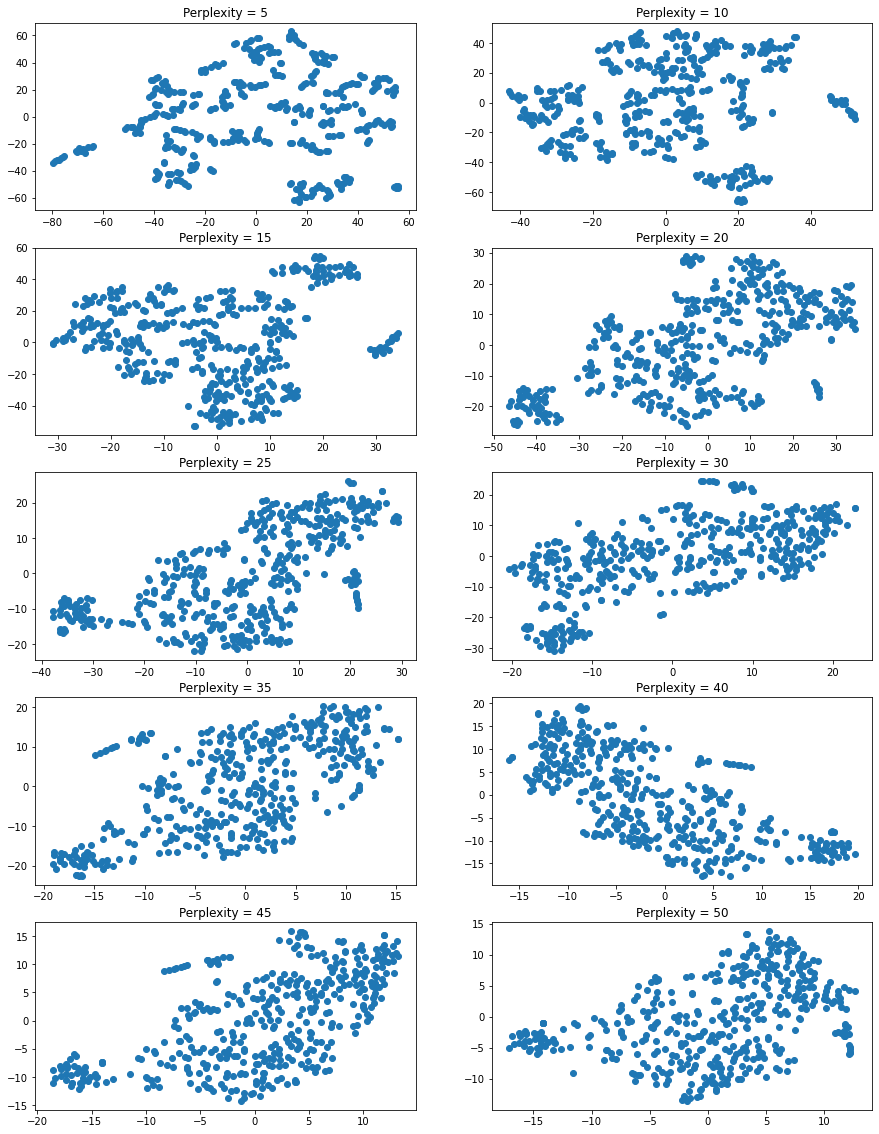

In [110]:
fig, axs = plt.subplots(5, 2, figsize=(15,20))
idx = 0
for i in range(0,5):
    for j in range(0,2):
        data = data_tsne_list[idx]; idx+=1
        axs[i, j].scatter(data["tsne"][:,0], data["tsne"][:,1])
        axs[i, j].set_title(f'Perplexity = {data["perp"]}')

# PCA Clustering

In [111]:
X = pd.DataFrame(data_pca)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       421 non-null    float64
 1   1       421 non-null    float64
 2   2       421 non-null    float64
 3   3       421 non-null    float64
 4   4       421 non-null    float64
dtypes: float64(5)
memory usage: 16.6 KB


In [112]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,421.0,3.988628e-18,0.020183,-0.016189,-0.010744,-0.006902,0.000135,0.167345
1,421.0,1.353579e-18,0.014297,-0.039079,-0.004526,0.001216,0.003872,0.205103
2,421.0,4.903375e-19,0.007797,-0.026028,-0.004679,0.001186,0.004848,0.028718
3,421.0,3.183073e-18,0.007123,-0.027864,-0.003420,-0.000124,0.003479,0.028362
4,421.0,2.026248e-18,0.005922,-0.028283,-0.002479,-0.000173,0.001986,0.034015


In [113]:
range_values = range(1,10)
sum_squares = []
silhouette_coefs = []

for i in range_values:
    kmeans = KMeans(i)
    kmeans.fit(X)
    sum_squares.append(kmeans.inertia_)
    labels = kmeans.labels_
    if i > 1: silhouette_coefs.append(silhouette_score(X, labels, metric='euclidean'))
    else: silhouette_coefs.append(0)

Text(0, 0.5, 'Squere sum of cluster')

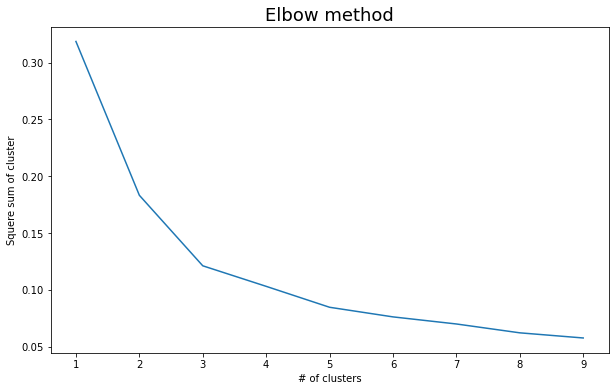

In [114]:
plt.figure(figsize=(10,6))
plt.plot(range_values, sum_squares)
plt.title('Elbow method',{'fontsize':18})
plt.xlabel('# of clusters')
plt.ylabel('Squere sum of cluster')

Text(0, 0.5, 'Silhouette coef of cluster')

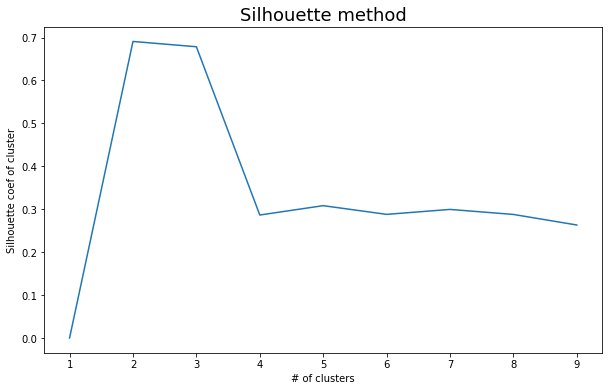

In [115]:
plt.figure(figsize=(10,6))
plt.plot(range_values, silhouette_coefs)
plt.title('Silhouette method',{'fontsize':18})
plt.xlabel('# of clusters')
plt.ylabel('Silhouette coef of cluster')

# T-SNE Clustering

In [116]:
model_tsne = TSNE(random_state=0, verbose=0, perplexity=10)
data_tsne = model_tsne.fit_transform(data_pca)
X_tsne = pd.DataFrame(data_tsne)
X_tsne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       421 non-null    float32
 1   1       421 non-null    float32
dtypes: float32(2)
memory usage: 3.4 KB


In [117]:
X_tsne.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,421.0,0.671166,21.866100,-42.997902,-15.098408,1.862826,17.918859,52.015781
1,421.0,-0.444877,28.507454,-66.377754,-20.343418,0.538023,23.381769,47.969536


Text(0, 0.5, 'Squere sum of cluster')

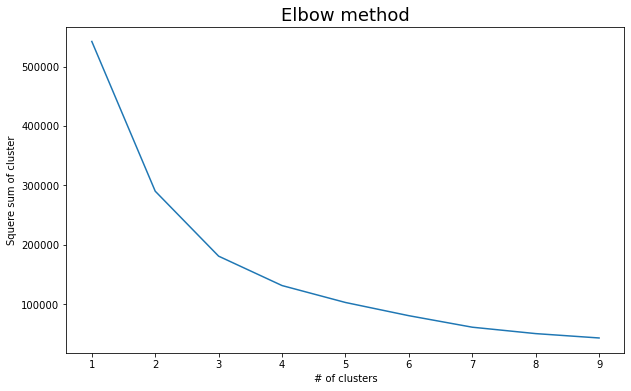

In [118]:
range_values = range(1,10)
sum_squares = []
silhouette_coefs = []

for i in range_values:
    kmeans = KMeans(i)
    kmeans.fit(X_tsne)
    sum_squares.append(kmeans.inertia_)
    labels = kmeans.labels_
    if i > 1: silhouette_coefs.append(silhouette_score(X_tsne, labels, metric='euclidean'))
    else: silhouette_coefs.append(0)

plt.figure(figsize=(10,6))
plt.plot(range_values, sum_squares)
plt.title('Elbow method',{'fontsize':18})
plt.xlabel('# of clusters')
plt.ylabel('Squere sum of cluster')

Text(0, 0.5, 'Silhouette coef of cluster')

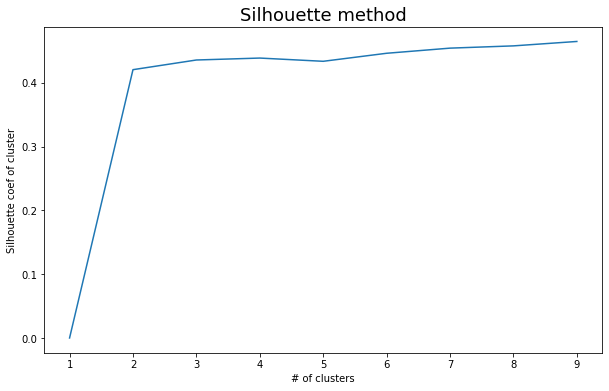

In [119]:
plt.figure(figsize=(10,6))
plt.plot(range_values, silhouette_coefs)
plt.title('Silhouette method',{'fontsize':18})
plt.xlabel('# of clusters')
plt.ylabel('Silhouette coef of cluster')